In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_raw  = pd.read_csv("heart.csv")
data = data_raw.copy()

In [3]:
data[data.Cholesterol == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [6]:
data.replace({"Cholesterol":0},np.nan,inplace=True)

In [7]:
data.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer, KNNImputer

In [8]:
simple_imp = SimpleImputer(missing_values= np.nan , strategy="mean")

In [9]:
simple_imp.fit(data[["Cholesterol"]])

SimpleImputer()

In [10]:
data["Cholesterol"] = simple_imp.transform(data[["Cholesterol"]])

In [11]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [16]:
data2 = data_raw.copy()
data2.replace({"Cholesterol":0},np.nan,inplace=True)
simple_imp2 = SimpleImputer(missing_values= np.nan , strategy="constant",fill_value= 100)

In [17]:
data2["Cholesterol"] = simple_imp2.fit_transform(data2[["Cholesterol"]])

In [18]:
data2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,217.535948,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,77.662373,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

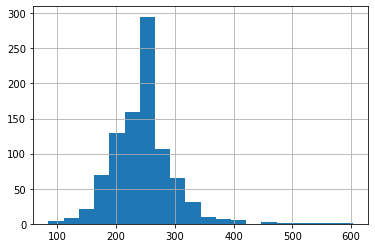

In [21]:
data.Cholesterol.hist(bins= 20)

<AxesSubplot:>

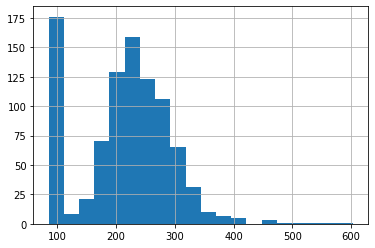

In [22]:
data2.Cholesterol.hist(bins= 20)